# 𝙾𝚌𝚎𝚊𝚗𝚒𝚌 𝙽𝚒𝚗𝚘 𝙸𝚗𝚍𝚎𝚡 ( 𝙾𝙽𝙸 )

* ONI is a measure of the El Niño-Southern Oscillation, and other indices can confirm whether features consistent with a coupled ocean-atmosphere phenomenon accompanied these periods.

* 3 month running mean of ERSST.v5 SST anomalies in the Niño 3.4 region (5oN-5oS, 120o-170oW)]

* We read from this website: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data

In [5]:
html = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php'
csv = 'ONI_data.csv'
# 1. Read all HTML tables from a given URL
ONI_table = pd.read_html(html, header=0, na_values="DJF", index_col=0)[8].dropna()# .head(50)

print(ONI_table.head())

# 2. Write first table, for example, to the CSV file
ONI_table.to_csv(csv)

      DJF   JFM   FMA   MAM   AMJ   MJJ   JJA   JAS   ASO   SON   OND   NDJ
Year                                                                       
1950 -1.5  -1.3  -1.2  -1.2  -1.1  -0.9  -0.5  -0.4  -0.4  -0.4  -0.6  -0.8
1951 -0.8  -0.5  -0.2   0.2   0.4   0.6   0.7   0.9   1.0   1.2   1.0   0.8
1952  0.5   0.4   0.3   0.3   0.2   0.0  -0.1   0.0   0.2   0.1   0.0   0.1
1953  0.4   0.6   0.6   0.7   0.8   0.8   0.7   0.7   0.8   0.8   0.8   0.8
1954  0.8   0.5   0.0  -0.4  -0.5  -0.5  -0.6  -0.8  -0.9  -0.8  -0.7  -0.7


# each line is one year

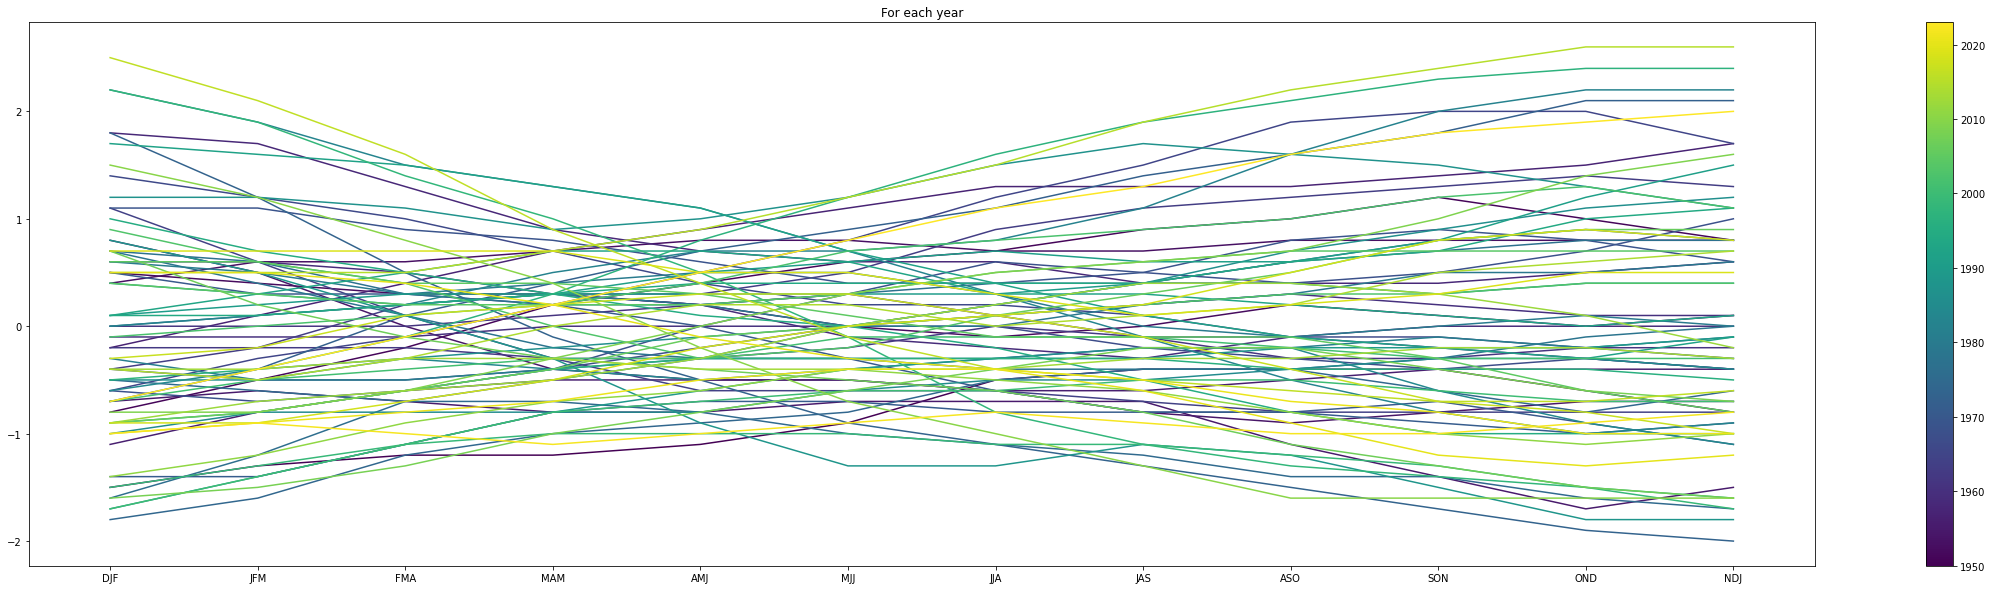

In [6]:
plt.figure(figsize=(40,10))
plt.title("For each year")

# Generate 12 equally spaced values between 0 and 1
values = np.linspace(0, 1, len(ONI_table))

# Create a colormap using these values
cmap = plt.cm.get_cmap('viridis')

# Get the corresponding colors from the colormap
colors = [cmap(value) for value in values]

# Define your mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='viridis', 
                           norm=plt.Normalize(vmin=ONI_table.index.astype(int).min(),
                                              vmax=ONI_table.index.astype(int).max()))

# df.plot(legend=False, colormap='viridis', figsize=(12,7));


# Change the numeric ticks into ones that match the x-axis
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()) ) # .strftime(date_format='%Y'))


for i, (year, row) in enumerate(ONI_table.iterrows()):
    # print(row)
    plt.plot(row.astype('float'), color=colors[i])
    
    
#plt.axhline(y=0, color='k', linestyle='-')


cbar = plt.colorbar(sm);

#print("last row\n", row.astype('float'))

# each line is a 3-months period

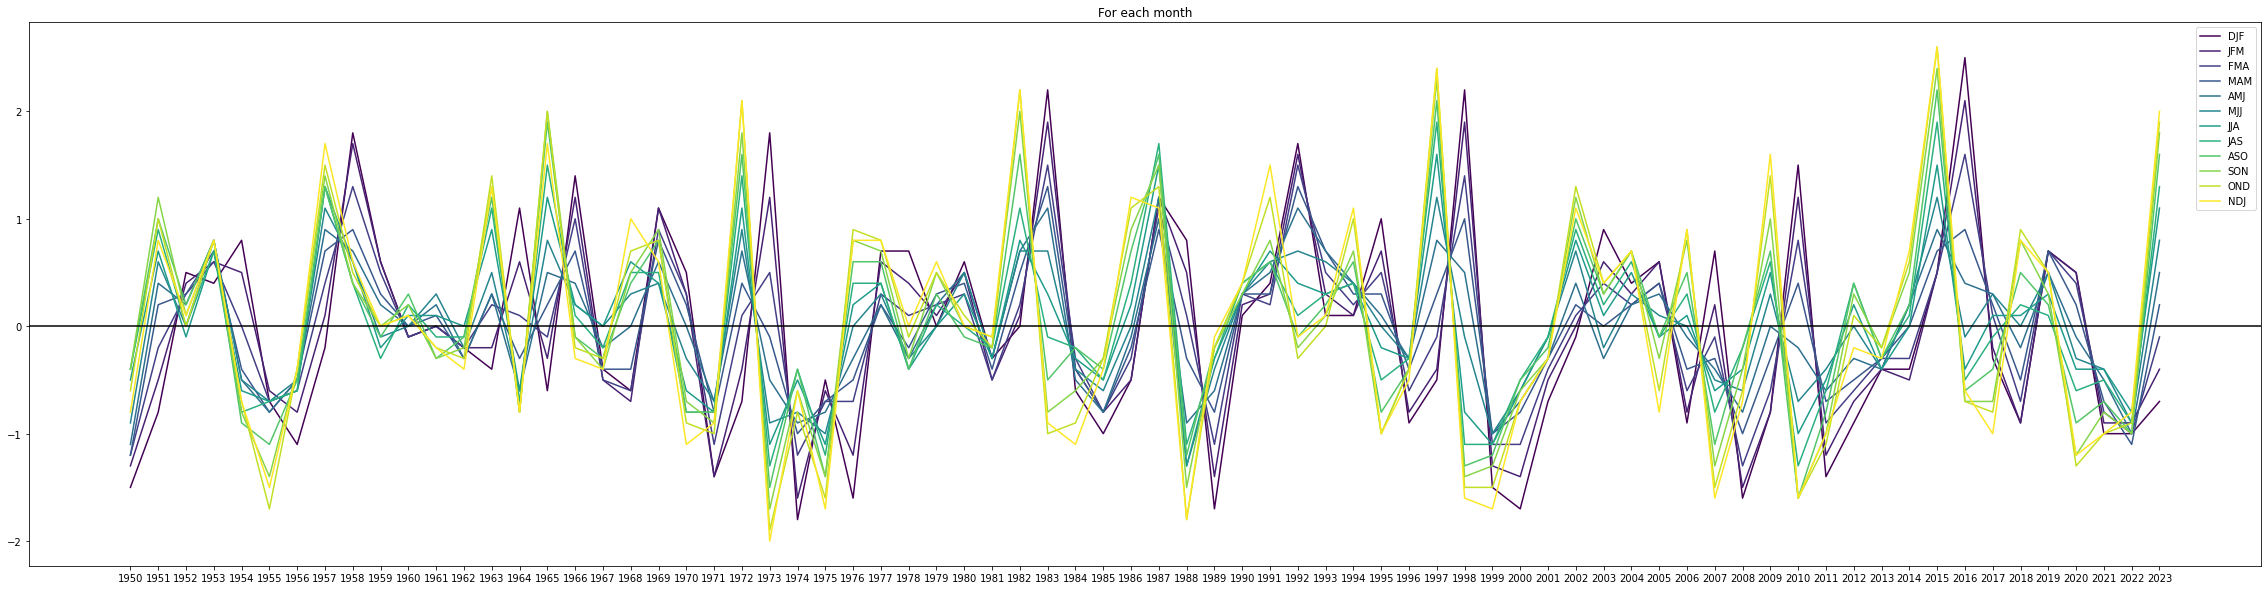

In [7]:
plt.figure(figsize=(40,10))
ax = plt.axes()
plt.title("For each month")

# Generate 12 equally spaced values between 0 and 1
values = np.linspace(0, 1, 12)

# Create a colormap using these values
cmap = plt.cm.get_cmap('viridis') # hsv')

# Get the corresponding colors from the colormap
colors = [cmap(value) for value in values]

for i_col, column in enumerate(ONI_table):
    line, = ax.plot(ONI_table[column].astype('float'), label=column, color=colors[i_col])

    
ax.axhline(y=0, color='k', linestyle='-')
ax.legend()
# print("last column\n", ONI_table[column].astype('float'))

plt.show()

# mean, min, max, ... 

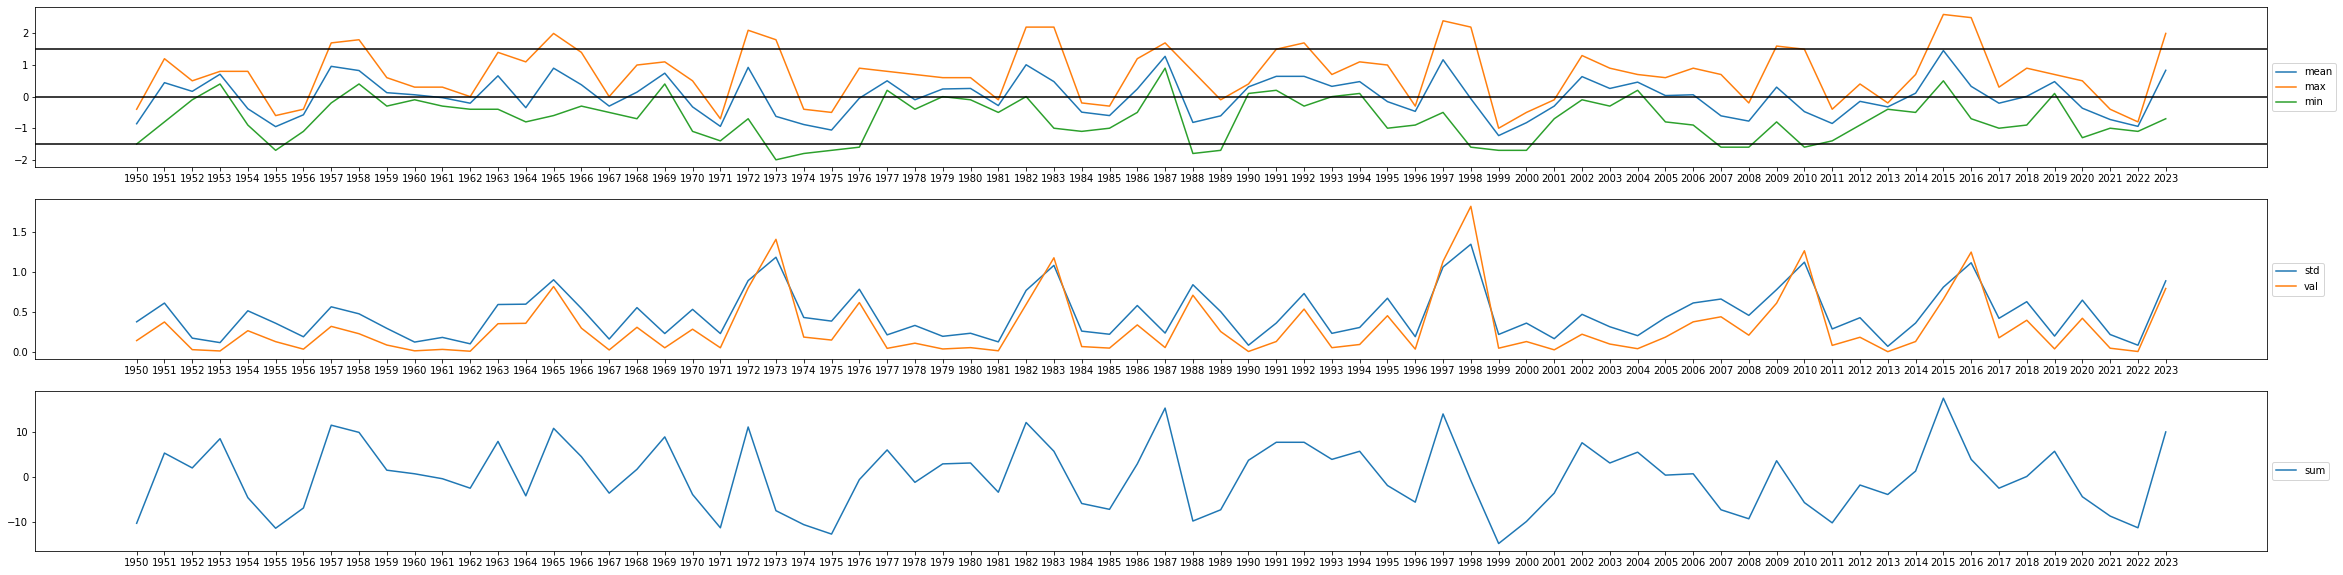

In [11]:
df_mean = []
df_max = []
df_min = []
df_year = []
df_sum = []
df_std = []
df_var = []

for year, value in ONI_table.iterrows():
    
    tmp = np.array(value).astype(float)
    
    #print(tmp.mean())
    
    # print(tmp.std())
    
    #tmp.mean()
    df_mean.append(tmp.mean())
    df_max.append(tmp.max())
    df_min.append(tmp.min())
    df_sum.append(tmp.sum())
    df_std.append(tmp.std())
    df_var.append(tmp.var())
    df_year.append(year)
    
    #print(np.array(value).astype(float).max())
    
# mean, max, min temperature (legend)

# df_year = [1950, 1999,2010,2024]

# plt.figure(figsize=(40,10))

fig, axs = plt.subplots(3, 1, figsize=(40,10))

all_lists = [df_mean, df_max, df_min]


df = pd.DataFrame.from_dict({'mean': df_mean, 
                             'max': df_max, 
                             'min': df_min, 
                             'sum': df_sum, 
                             'std': df_std, 
                             'var': df_var} ) # , index=df_year)


axs[0].plot(df_year, df['mean'], label='mean')
axs[0].plot(df_year, df['max'], label='max')
axs[0].plot(df_year, df['min'], label='min')

axs[1].plot(df_year, df['std'], label='std')
axs[1].plot(df_year, df['var'], label='val')

axs[2].plot(df_year, df['sum'], label='sum')
#print(df)


if False:
    for col_key in df:
        #print(np.array(df[col_key]))
        axs[0].plot(df_year, df[col_key], label=col_key)


axs[0].axhline(y=-1.5, color='k', linestyle='-')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axhline(y=1.5, color='k', linestyle='-')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Just testing color maps

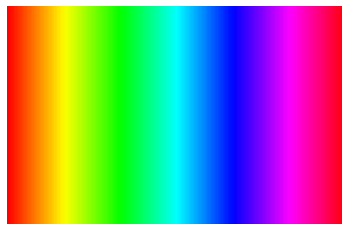

In [12]:

# Define custom colors for the circle
colors = ['blue', 'green', 'red', 'yellow', 'blue']

# Create a colormap with a smooth transition between the colors
cmap = 'hsv' #  matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors, N=256)

# Plotting the colormap
plt.imshow(np.linspace(0, 1, 256).reshape(1, -1), aspect='auto', cmap=cmap)
plt.axis('off')
plt.show()